<a href="https://colab.research.google.com/github/yaolihua081/COVID-19-Project/blob/main/CS06FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import sys, platform, numpy as np, nltk, re, sklearn, pandas as pd, seaborn as sns, collections
import matplotlib.pyplot as plt
import hashlib
import matplotlib.style as style
style.use('fivethirtyeight')

import altair as alt

In [ ]:
#!pip install kaggle
#from google.colab import files
#files.upload()

In [ ]:
ls

COVID-19_Cases_Summarized_by_Age_GroupNov17.csv
COVID-19__Cases_Summarized_by_Race_and_EthnicityNov17.csv
Provisional_COVID-19_Death_Counts_by_Sex__Age__and_StateNov12.csv
Provisional_COVID-19_Death_Counts_by_Sex__Age__and_WeekNov12.csv
sample_data/
United_States_COVIDNov17.csv
USA_Covid_Analysis.html
USA_Covid_Geo.html
USAStateABV.csv
Weekly_counts_of_death_by_jurisdiction_and_cause_of_deathNov12.csv


In [37]:
#United_States_Covid=pd.read_csv('United_States_COVIDOct26.csv')
#United_States_Covid=pd.read_csv('United_States_COVIDNov17.csv')#https://data.cdc.gov/Case-Surveillance/United-States-COVID-19-Cases-and-Deaths-by-State-o/9mfq-cb36
United_States_Covid=pd.read_csv('https://raw.githubusercontent.com/yaolihua081/Stanford-CS06dataviz/main/United_States_COVIDDec5.csv')
#USAStateABV_data=pd.read_csv('USAStateABV.csv')
USAStateABV_data=pd.read_csv('https://raw.githubusercontent.com/yaolihua081/Stanford-CS06dataviz/main/USAStateABV.csv')
#United_States_Covid=pd.read_csv('united_states_covid19_cases_and_deaths_by_state.csv')
#Sex_age_state_data=pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_StateNov12.csv')#https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-S/9bhg-hcku
#Sex_age_week_data=pd.read_csv('Provisional_COVID-19_Death_Counts_by_Sex__Age__and_WeekNov12.csv')#https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Sex-Age-and-W/vsak-wrfu
Sex_age_week_data=pd.read_csv('https://raw.githubusercontent.com/yaolihua081/Stanford-CS06dataviz/main/Provisional_COVID-19_Death_Counts_by_Sex__Age__and_WeekDec5.csv')
Sex_age_week_data.dropna()
United_States_Covid.dropna()
#Sex_age_state_data.dropna()

#Weekly_Death_data=pd.read_csv('Weekly_counts_of_death_by_jurisdiction_and_cause_of_deathNov12.csv')#https://data.cdc.gov/NCHS/Weekly-counts-of-death-by-jurisdiction-and-cause-o/u6jv-9ijr
#Weekly_Death_data.dropna()
#SF data has age and ethnic/race
#Age_covid_data=pd.read_csv('COVID-19_Cases_Summarized_by_Age_GroupNov17.csv')#Sanfrancisco, https://data.sfgov.org/COVID-19/COVID-19-Cases-Summarized-by-Age-Group/sunc-2t3k
Age_covid_data=pd.read_csv('https://raw.githubusercontent.com/yaolihua081/Stanford-CS06dataviz/main/COVID-19_Cases_Summarized_by_Age_GroupDec5.csv')
Age_covid_data.dropna()
#Race_covid_data=pd.read_csv('COVID-19__Cases_Summarized_by_Race_and_EthnicityNov17.csv')#https://data.sfgov.org/COVID-19/COVID-19-Cases-Summarized-by-Race-and-Ethnicity/vqqm-nsqg
Race_covid_data=pd.read_csv('https://raw.githubusercontent.com/yaolihua081/Stanford-CS06dataviz/main/COVID-19__Cases_Summarized_by_Race_and_EthnicityDec5.csv')
Race_covid_data.dropna()

,Specimen Collection Date,Race/Ethnicity,New Confirmed Cases,Cumulative Confirmed Cases,Last Updated at
0,2020/06/11,Asian,2,383,12/05/2020 02:15:01 PM
1,2020/06/12,Asian,1,384,12/05/2020 02:15:01 PM
2,2020/06/14,Asian,1,387,12/05/2020 02:15:01 PM
3,2020/06/16,Asian,3,390,12/05/2020 02:15:01 PM
4,2020/06/17,Asian,2,392,12/05/2020 02:15:01 PM
...,...,...,...,...,...
2520,2020/09/04,Other,0,23,12/05/2020 02:15:01 PM
2521,2020/09/02,Black or African American,1,579,12/05/2020 02:15:01 PM
2522,2020/09/03,Black or African American,4,583,12/05/2020 02:15:01 PM
2523,2020/09/04,Black or African American,4,587,12/05/2020 02:15:01 PM


In [ ]:
United_States_Covid

In [38]:
United_States_Covid.head()
United_States_Covid['month']=pd.DatetimeIndex(United_States_Covid['submission_date']).month
United_States_Covid['week']=pd.DatetimeIndex(United_States_Covid['submission_date']).week
state_deaths_sum=United_States_Covid.groupby('week')['new_death'].sum()
state_name=state_deaths_sum.index
#state_sum[state_name[1]]
#State monthly cases
week_death_sum=United_States_Covid.groupby('week')['new_death'].sum()

temp=pd.DataFrame(week_death_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(week_death_sum.values)],axis=1).reindex(temp.index)
temp.columns=['week','total_deaths']
week_death_covid=temp
week_death_covid

week_case_sum=United_States_Covid.groupby('week')['new_case'].sum()

temp=pd.DataFrame(week_case_sum)
temp=pd.DataFrame(temp.index.tolist())

temp=pd.concat([temp,pd.DataFrame(week_case_sum.values)],axis=1).reindex(temp.index)
temp.columns=['week','total_cases']
week_case_covid=temp
week_case_covid
all_week_data=pd.merge(week_case_covid,week_death_covid)
all_week_data.head() #this data has weekly cases and deaths al for states in the USA.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  This is separate from the ipykernel package so we can avoid doing imports until


,week,total_cases,total_deaths
0,4,5,0
1,5,3,0
2,6,3,0
3,7,2,0
4,8,2,0


In [39]:
#define wmonthly data for SF by age and by Race/Ethinc
Age_covid_data['month']=pd.DatetimeIndex(Age_covid_data['Specimen Collection Date']).month

age_group_sum=Age_covid_data.groupby(['Age Group','month'])['New Confirmed Cases'].sum()

temp=pd.DataFrame(age_group_sum)
temp=pd.DataFrame(temp.index.tolist())
temp

age_covid_SF_month_data=pd.concat([temp,pd.DataFrame(age_group_sum.values)],axis=1).reindex(temp.index)

age_covid_SF_month_data.columns=['age_group','month','total_cases']
age_covid_SF_month_data#total case 13762

Race_covid_data['month']=pd.DatetimeIndex(Race_covid_data['Specimen Collection Date']).month
Race_group_sum=Race_covid_data.groupby(['Race/Ethnicity','month'])['New Confirmed Cases'].sum()
len(Race_group_sum.values)
temp=pd.DataFrame(Race_group_sum)
temp=pd.DataFrame(temp.index.tolist())


Race_covid_SF_month_data=pd.concat([temp,pd.DataFrame(Race_group_sum.values)],axis=1).reindex(temp.index)
Race_covid_SF_month_data.columns=['Race/Ethnicity','month','total_cases']
Race_covid_SF_month_data   #total case 13762

,Race/Ethnicity,month,total_cases
0,Asian,3,94
1,Asian,4,164
2,Asian,5,90
3,Asian,6,131
4,Asian,7,275
...,...,...,...
82,White,8,286
83,White,9,308
84,White,10,315
85,White,11,1658


In [40]:
#define weekly data for SF by age Age_covid_data['week']=pd.DatetimeIndex(Age_covid_data['Specimen Collection Date']).week
Age_covid_data['week']=pd.DatetimeIndex(Age_covid_data['Specimen Collection Date']).week


age_group_sum=Age_covid_data.groupby(['Age Group','week'])['New Confirmed Cases'].sum()

temp=pd.DataFrame(age_group_sum)
temp=pd.DataFrame(temp.index.tolist())
temp

age_covid_SF_week_data=pd.concat([temp,pd.DataFrame(age_group_sum.values)],axis=1).reindex(temp.index)

age_covid_SF_week_data.columns=['age_group','week','total_cases']
age_covid_SF_week_data#total case 13762

Race_covid_data['week']=pd.DatetimeIndex(Race_covid_data['Specimen Collection Date']).week
Race_group_sum=Race_covid_data.groupby(['Race/Ethnicity','week'])['New Confirmed Cases'].sum()
len(Race_group_sum.values)
temp=pd.DataFrame(Race_group_sum)
temp=pd.DataFrame(temp.index.tolist())


Race_covid_SF_week_data=pd.concat([temp,pd.DataFrame(Race_group_sum.values)],axis=1).reindex(temp.index)
Race_covid_SF_week_data.columns=['Race/Ethnicity','week','total_cases']
Race_covid_SF_week_data   #total case 13762

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  app.launch_new_instance()


,Race/Ethnicity,week,total_cases
0,Asian,11,7
1,Asian,12,28
2,Asian,13,37
3,Asian,14,54
4,Asian,15,40
...,...,...,...
333,White,45,445
334,White,46,423
335,White,47,501
336,White,48,231


In [41]:
#Covid by death weely by age
Sex_age_week_data['week']=Sex_age_week_data['MMWR Week']
Sex_age_week_data
filter=Sex_age_week_data['Sex']=='All Sex'
Sex_age_week_data=Sex_age_week_data[filter]
Sex_age_week_data

,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths,week
0,12/02/2020,United States,5,02/01/2020,All Sex,All Ages,58790,0,5
1,12/02/2020,United States,5,02/01/2020,All Sex,Under 1 year,389,0,5
2,12/02/2020,United States,5,02/01/2020,All Sex,1-4 years,65,0,5
3,12/02/2020,United States,5,02/01/2020,All Sex,5-14 years,111,0,5
4,12/02/2020,United States,5,02/01/2020,All Sex,15-24 years,574,0,5
...,...,...,...,...,...,...,...,...,...
1555,12/02/2020,United States,48,11/28/2020,All Sex,45-54 years,526,19,48
1556,12/02/2020,United States,48,11/28/2020,All Sex,55-64 years,1313,94,48
1557,12/02/2020,United States,48,11/28/2020,All Sex,65-74 years,2431,167,48
1558,12/02/2020,United States,48,11/28/2020,All Sex,75-84 years,3245,259,48


In [42]:
#temp=pd.merge(Sex_age_week_data,age_covid_SF_week_data)
#all_SF_week_data=pd.merge(Sex_age_week_data,age_covid_SF_week_data)
#age_covid_SF_week_data['age_group']
#match this age group with SF data age group
Sex_age_week_data['Age Group'].unique().tolist()

def convert(x):
  y=''
  if x in ['Under 1 year','1-4 years','5-14 years']:
    y='under 18'
  elif x in ['25-34 years']:
    y= '18-30'
  elif x in ['35-44 years']:
    y= '31-40'
  elif x in ['45-54 years']:
    y='41-50'
  elif x in ['55-64 years'] :
    y='51-60'
  elif x in ['65-74 years'] :
    y='61-70' 
  elif x in ['75-84 years'] :
    y='71-80'  
  else:
    y= '81+'  
  return y

Sex_age_week_data['age_group']=Sex_age_week_data['Age Group'].apply(lambda x: convert(x))


In [43]:
Sex_age_week_data.sort_values(by='age_group')
age_covid_SF_week_data.sort_values(by='age_group')
#state_covid_deaths_sorted=pd.merge(state_covid_deaths_sorted,USAStateABV_data_sorted,how='right')
#state_covid_deaths_sorted=state_covid_deaths_sorted.sort_values(by='State')

,age_group,week,total_cases
0,0-4,15,2
20,0-4,35,25
21,0-4,36,14
22,0-4,37,7
23,0-4,38,14
...,...,...,...
461,80+,27,10
462,80+,28,10
454,80+,20,9
484,Unknown,48,1


In [44]:
age_covid_SF_week_data['SF_total_cases']=age_covid_SF_week_data['total_cases']
age_covid_SF_week_data.drop(['total_cases'],axis = 1, inplace=True)
age_covid_SF_week_data
colors=age_covid_SF_week_data['age_group'].unique()
#Sex_age_week_data
colors
filter=Sex_age_week_data['week'] >=11
Sex_age_week_data=Sex_age_week_data[filter]
filter=all_week_data['week'] >=11
all_week_data=all_week_data[filter]
#all=pd.merge(Sex_age_week_data,age_covid_SF_week_data)
all_week_data
#all=pd.merge(all_week_data,age_covid_SF_week_data)

,week,total_cases,total_deaths
7,11,3113,48
8,12,29989,333
9,13,107451,2004
10,14,189600,6504
11,15,223497,12855
12,16,191331,17320
13,17,211593,14839
14,18,193640,13534
15,19,172450,12300
16,20,155106,9651


In [45]:
Sex_age_week_data_sorted=Sex_age_week_data.sort_values(by=['week','age_group'])
age_covid_SF_week_data_sorted=age_covid_SF_week_data.sort_values(by=['week','age_group'])

In [50]:
age_covid_SF_week_data_sorted

,age_group,week,SF_total_cases
140,21-24,11,1
179,25-29,11,6
218,30-39,11,14
257,40-49,11,8
330,50-59,11,10
...,...,...,...
368,50-59,49,83
406,60-69,49,50
445,70-79,49,17
483,80+,49,21


In [47]:
age_covid_SF_week_data_sorted
Sex_age_week_data_sorted
all_week_data=all_week_data.sort_values(by='week')
temp=pd.merge(age_covid_SF_week_data_sorted,Sex_age_week_data_sorted)
temp
#all=pd.merge(all_week_data,temp)
#all

,age_group,week,SF_total_cases,Data as of,State,MMWR Week,End Week,Sex,Age Group,Total Deaths,COVID-19 Deaths


In [55]:
#Plot
brush=alt.selection(type='interval')

bar1 = alt.Chart(all_week_data, title="USA Covid-19 Cases by Week and by Age_Group").mark_bar().encode(
     x='week:N',
     y=alt.Y('total_cases:Q', title="USA Total Cases"),
     color='total_deaths:Q'
     #color=alt.condition(brush, 'age_group:N', alt.value('colors'))
).add_selection(brush)

bar2 = alt.Chart(age_covid_SF_week_data_sorted,title="San Francisco Covid-19 Cases by Week and by Age Group").mark_bar().encode(
    x='week:N',
    y='SF_total_cases:Q',
    color='age_group:N',
    tooltip=['week:N',
             alt.Tooltip('age_group:N'),
             alt.Tooltip('SF_total_cases:Q')]
).add_selection(brush)


bar3 = alt.Chart(Race_covid_SF_week_data,title="San Francisco Covid-19 Cases by Week and by Race/Ethnic").mark_bar().encode(
     x='week:N',
     y=alt.Y('total_cases:Q',title="SF Total Cases"),
     color='Race/Ethnicity:N', 
     tooltip=['week:N',
             alt.Tooltip('Race/Ethnicity:N'),
             alt.Tooltip('total_cases:Q')]
).add_selection(brush)

bar4 = alt.Chart(Sex_age_week_data_sorted,title="USA Covid-19 Deaths by Week and by Age Group").mark_bar().encode(
     x='week:N',
     y=alt.Y('COVID-19 Deaths:Q',title="USA Covid Deaths"),
     color='age_group:N',
     tooltip=['week:N',
             alt.Tooltip('age_group:N'),
             alt.Tooltip('COVID-19 Deaths:Q')]
).add_selection(brush)


combined=bar1 & bar4 | bar2 & bar3


combined.save('USA_Covid_Analysis.html')
from google.colab import files
files.download('USA_Covid_Analysis.html')
combined 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

alt.HConcatChart(...)

In [28]:

bar1 = alt.Chart(all_week_data, title="USA Covid-19 Cases by Dec 4").mark_bar().encode(
     x='week:N',
     y=alt.Y('total_cases:Q', title="USA Total Cases"),
     color='total_deaths:Q'
     #color=alt.condition(brush, 'age_group:N', alt.value('colors'))
).interactive()

bar1


alt.Chart(...)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


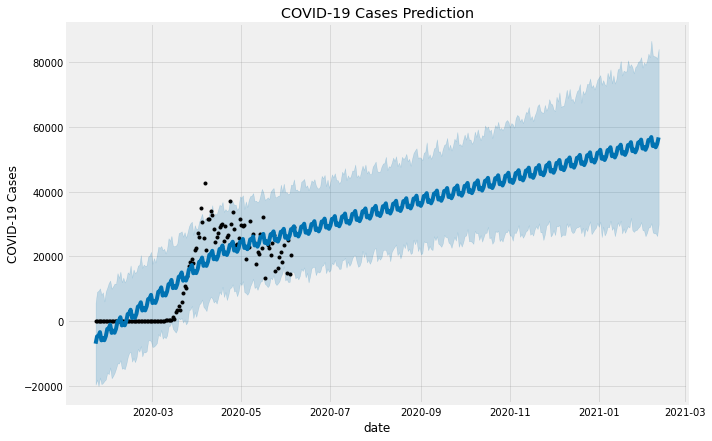

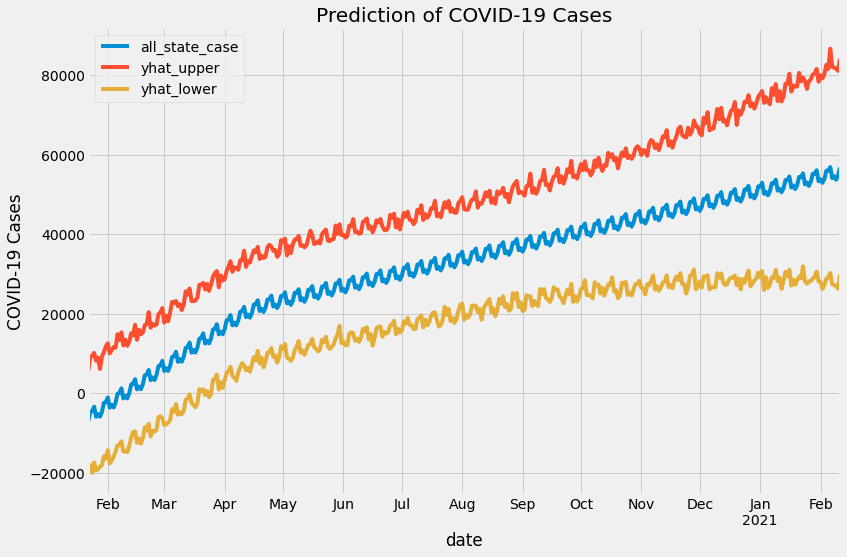

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



,submission_date,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,all_state_case,week,all_case
40,2020-03-02,6959.496418,-7814.723856,19526.768995,6959.496418,6959.496418,-661.153604,-661.153604,-661.153604,-661.153604,-661.153604,-661.153604,0.0,0.0,0.0,6298.342814,10,187170.947241
41,2020-03-03,7288.668434,-7379.848208,18105.126649,7288.668434,7288.668434,-1641.492885,-1641.492885,-1641.492885,-1641.492885,-1641.492885,-1641.492885,0.0,0.0,0.0,5647.175548,10,186519.779976
42,2020-03-04,7617.840450,-6742.341986,20375.188232,7617.840450,7617.840450,-737.170513,-737.170513,-737.170513,-737.170513,-737.170513,-737.170513,0.0,0.0,0.0,6880.669937,10,187753.274365
43,2020-03-05,7947.012465,-4000.952659,22993.391058,7947.012465,7947.012465,1175.921636,1175.921636,1175.921636,1175.921636,1175.921636,1175.921636,0.0,0.0,0.0,9122.934101,10,189995.538528
44,2020-03-06,8276.184484,-4648.883955,22710.023986,8276.184484,8276.184484,1035.003126,1035.003126,1035.003126,1035.003126,1035.003126,1035.003126,0.0,0.0,0.0,9311.187610,10,190183.792038
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2020-11-13,45488.480425,28084.262078,64410.439727,33466.631319,57496.042987,1035.003126,1035.003126,1035.003126,1035.003126,1035.003126,1035.003126,0.0,0.0,0.0,46523.483551,46,227396.087979
297,2020-11-14,45600.990085,29654.053826,66210.114508,33565.176760,57708.803259,1853.039070,1853.039070,1853.039070,1853.039070,1853.039070,1853.039070,0.0,0.0,0.0,47454.029155,46,228326.633582
298,2020-11-15,45713.499744,26700.695474,62343.714502,33663.722200,57921.457068,-1024.146830,-1024.146830,-1024.146830,-1024.146830,-1024.146830,-1024.146830,0.0,0.0,0.0,44689.352914,46,225561.957342
299,2020-11-16,45826.009404,27209.157930,63400.923036,33762.267641,58192.580879,-661.153604,-661.153604,-661.153604,-661.153604,-661.153604,-661.153604,0.0,0.0,0.0,45164.855799,47,226037.460227


In [48]:
#if use data before week 23, JUne 6, no black life matter moverment.
from fbprophet import Prophet
United_States_Covid_modify=pd.concat([pd.DataFrame(United_States_Covid.groupby('submission_date')['new_death'].sum().values),
                                         pd.DataFrame(United_States_Covid.groupby('submission_date')['new_case'].sum().values)],axis=1)

all_dates=United_States_Covid['submission_date'].unique()
United_States_Covid_modify.columns=['all_state_death','all_state_case']
United_States_Covid_modify['submission_date']=all_dates
filter=United_States_Covid_modify['submission_date'] <= '06/06/2020'
United_States_Covid_modify=United_States_Covid_modify[filter]
United_States_Covid_modify_temp=United_States_Covid_modify


United_States_Covid_modify_temp.rename(columns={"submission_date": "ds", "all_state_case": 'y'}, inplace=True)
my_model = Prophet(interval_width=.95)
my_model.fit(United_States_Covid_modify_temp)
future_dates=my_model.make_future_dataframe(periods=250, freq='D', include_history=True)
forecast = my_model.predict(future_dates)
my_model.plot(forecast)
plt.title('COVID-19 Cases Prediction')
plt.xlabel('date')
plt.ylabel('COVID-19 Cases')
  #forecast.head()
forecast.rename(columns={"ds": "submission_date", "yhat": 'all_state_case'}, inplace=True)

forecast_modify_case=forecast[['submission_date','all_state_case','yhat_upper','yhat_lower']]
plt.style.use('fivethirtyeight')
ax = forecast_modify_case.set_index('submission_date').plot(figsize=(12, 8))
ax.set_ylabel('COVID-19 Cases')
ax.set_xlabel('date')
ax.set_title('Prediction of COVID-19 Cases')
plt.show()


filter=forecast['submission_date'] <= '11/17/2020'
forecast=forecast[filter]
forecast['week']=pd.DatetimeIndex(forecast['submission_date']).week
filter=forecast['week'] >=10
forecast=forecast[filter]
forecast['all_case']=forecast['all_state_case'].apply(lambda x: x -forecast['all_state_case'].values[5]+all_week_data['total_cases'].values[5])
forecast

In [ ]:
meteorite=pd.read_csv("meteorite-landings.csv")
meteorite.loc[meteorite['mass'].idxmax()] #The max value-- mass of a meteor
# Let's make Hoba strike even more exciting by adding an educational video and a text

#Set the location of Hoba 
map_hoba = folium.Map(location=[-19.5833,17.9167],
                        tiles = "Stamen Terrain",
                    
                        zoom_start = 9)

# Add a Hyperlink about Hoba
folium.Marker([-19.5833,17.9167],
              popup='<a href="https://www.youtube.com/watch?v=eQcAxzZtBwc" target="_blank">Hoba</a>',
              icon=folium.Icon(color='green')
             ).add_to(map_hoba)


map_hoba